In [1]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGBR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import shap
import seaborn as sns
import numpy as np
import pandas as pd
import os


/home/chl/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
x0 = pd.read_excel('/home/chl/桌面/ML_new/nanoplastic_std_x0.xlsx')
y = pd.read_excel('/home/chl/桌面/ML_new/nanoplastic_std_y.xlsx')['Cell viability']


In [ ]:
for i in range(500):     
    
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(x0,y,test_size=0.2,random_state=i)
    xgbr = XGBR()
    CV_score = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()#五折交叉验证会输出5个结果，用mean取平均值
    #cross_val_predict计算得到的样本预测输出不能作为模型的泛化性能参考
    CV_predictions = cross_val_predict(xgbr, Xtrain, Ytrain, cv=5)
    print("5CV_SCORE:",CV_score)
    regressor = xgbr.fit(Xtrain, Ytrain)
    test_predictions = regressor.predict(Xtest)
    score_test = regressor.score(Xtest,Ytest)
    print("TEST_SCORE:",score_test)
#     if CV < CV_score and test < score_test:
#         CV = CV_score
#         test = score_test
    if CV_score>0.72 and score_test>0.78 and (score_test-CV_score<=0.1):
       
        print("5cv:",CV_score,"TEST:",score_test,"random_state",i)

In [6]:
print("XGB最好的random_state是295!!")

XGB最好的random_state是295!!


In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x0,y,test_size=0.2,random_state=295)

In [27]:
xgbr = XGBR(random_state=42)
CV_score = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()#五折交叉验证会输出5个结果，用mean取平均值
CV_score

0.7274428975258751

In [26]:
pd.DataFrame(Xtrain).to_excel(r'E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Xtrain.xlsx')
pd.DataFrame(Ytrain).to_excel(r'E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Ytrain.xlsx')
pd.DataFrame(Xtest).to_excel(r'E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Xtest.xlsx')
pd.DataFrame(Ytest).to_excel(r'E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Ytest.xlsx')

In [28]:
import pandas as pd
import numpy as np
Xtrain = pd.read_excel(r"E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Xtrain.xlsx")
Xtest = pd.read_excel(r"E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Xtest.xlsx")
Ytrain = pd.read_excel(r"E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Ytrain.xlsx")['Cell viability']
Ytest = pd.read_excel(r"E:\nanoplastics\nanoplastic_model\nano_best_dataset_XGB\Ytest.xlsx")['Cell viability']

In [30]:
xgbr = XGBR(random_state=42)
CV_score = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()#五折交叉验证会输出5个结果，用mean取平均值
CV_score


0.7274428975258751

Best_5cv score：0.7451213836480145 random_5cv:0
0
Best_5cv score：0.7451213836480145 lr_5cv:29
0.3
Best_5cv score：0.7539065234934441 n_est_5cv:191
192
Best_5cv score：0.7539065234934441 max_depth_5cv:5
6
Best_5cv score：0.7593668697287294 gamma_5cv:22
1.1
Best_5cv score：0.7593668697287294 alpha_5cv:0
0.0
5cv: 0.7593668697287294
RMSE_5CV 11.863690163214759
test: 0.8116843606547081
rmse_test 10.67205547249342


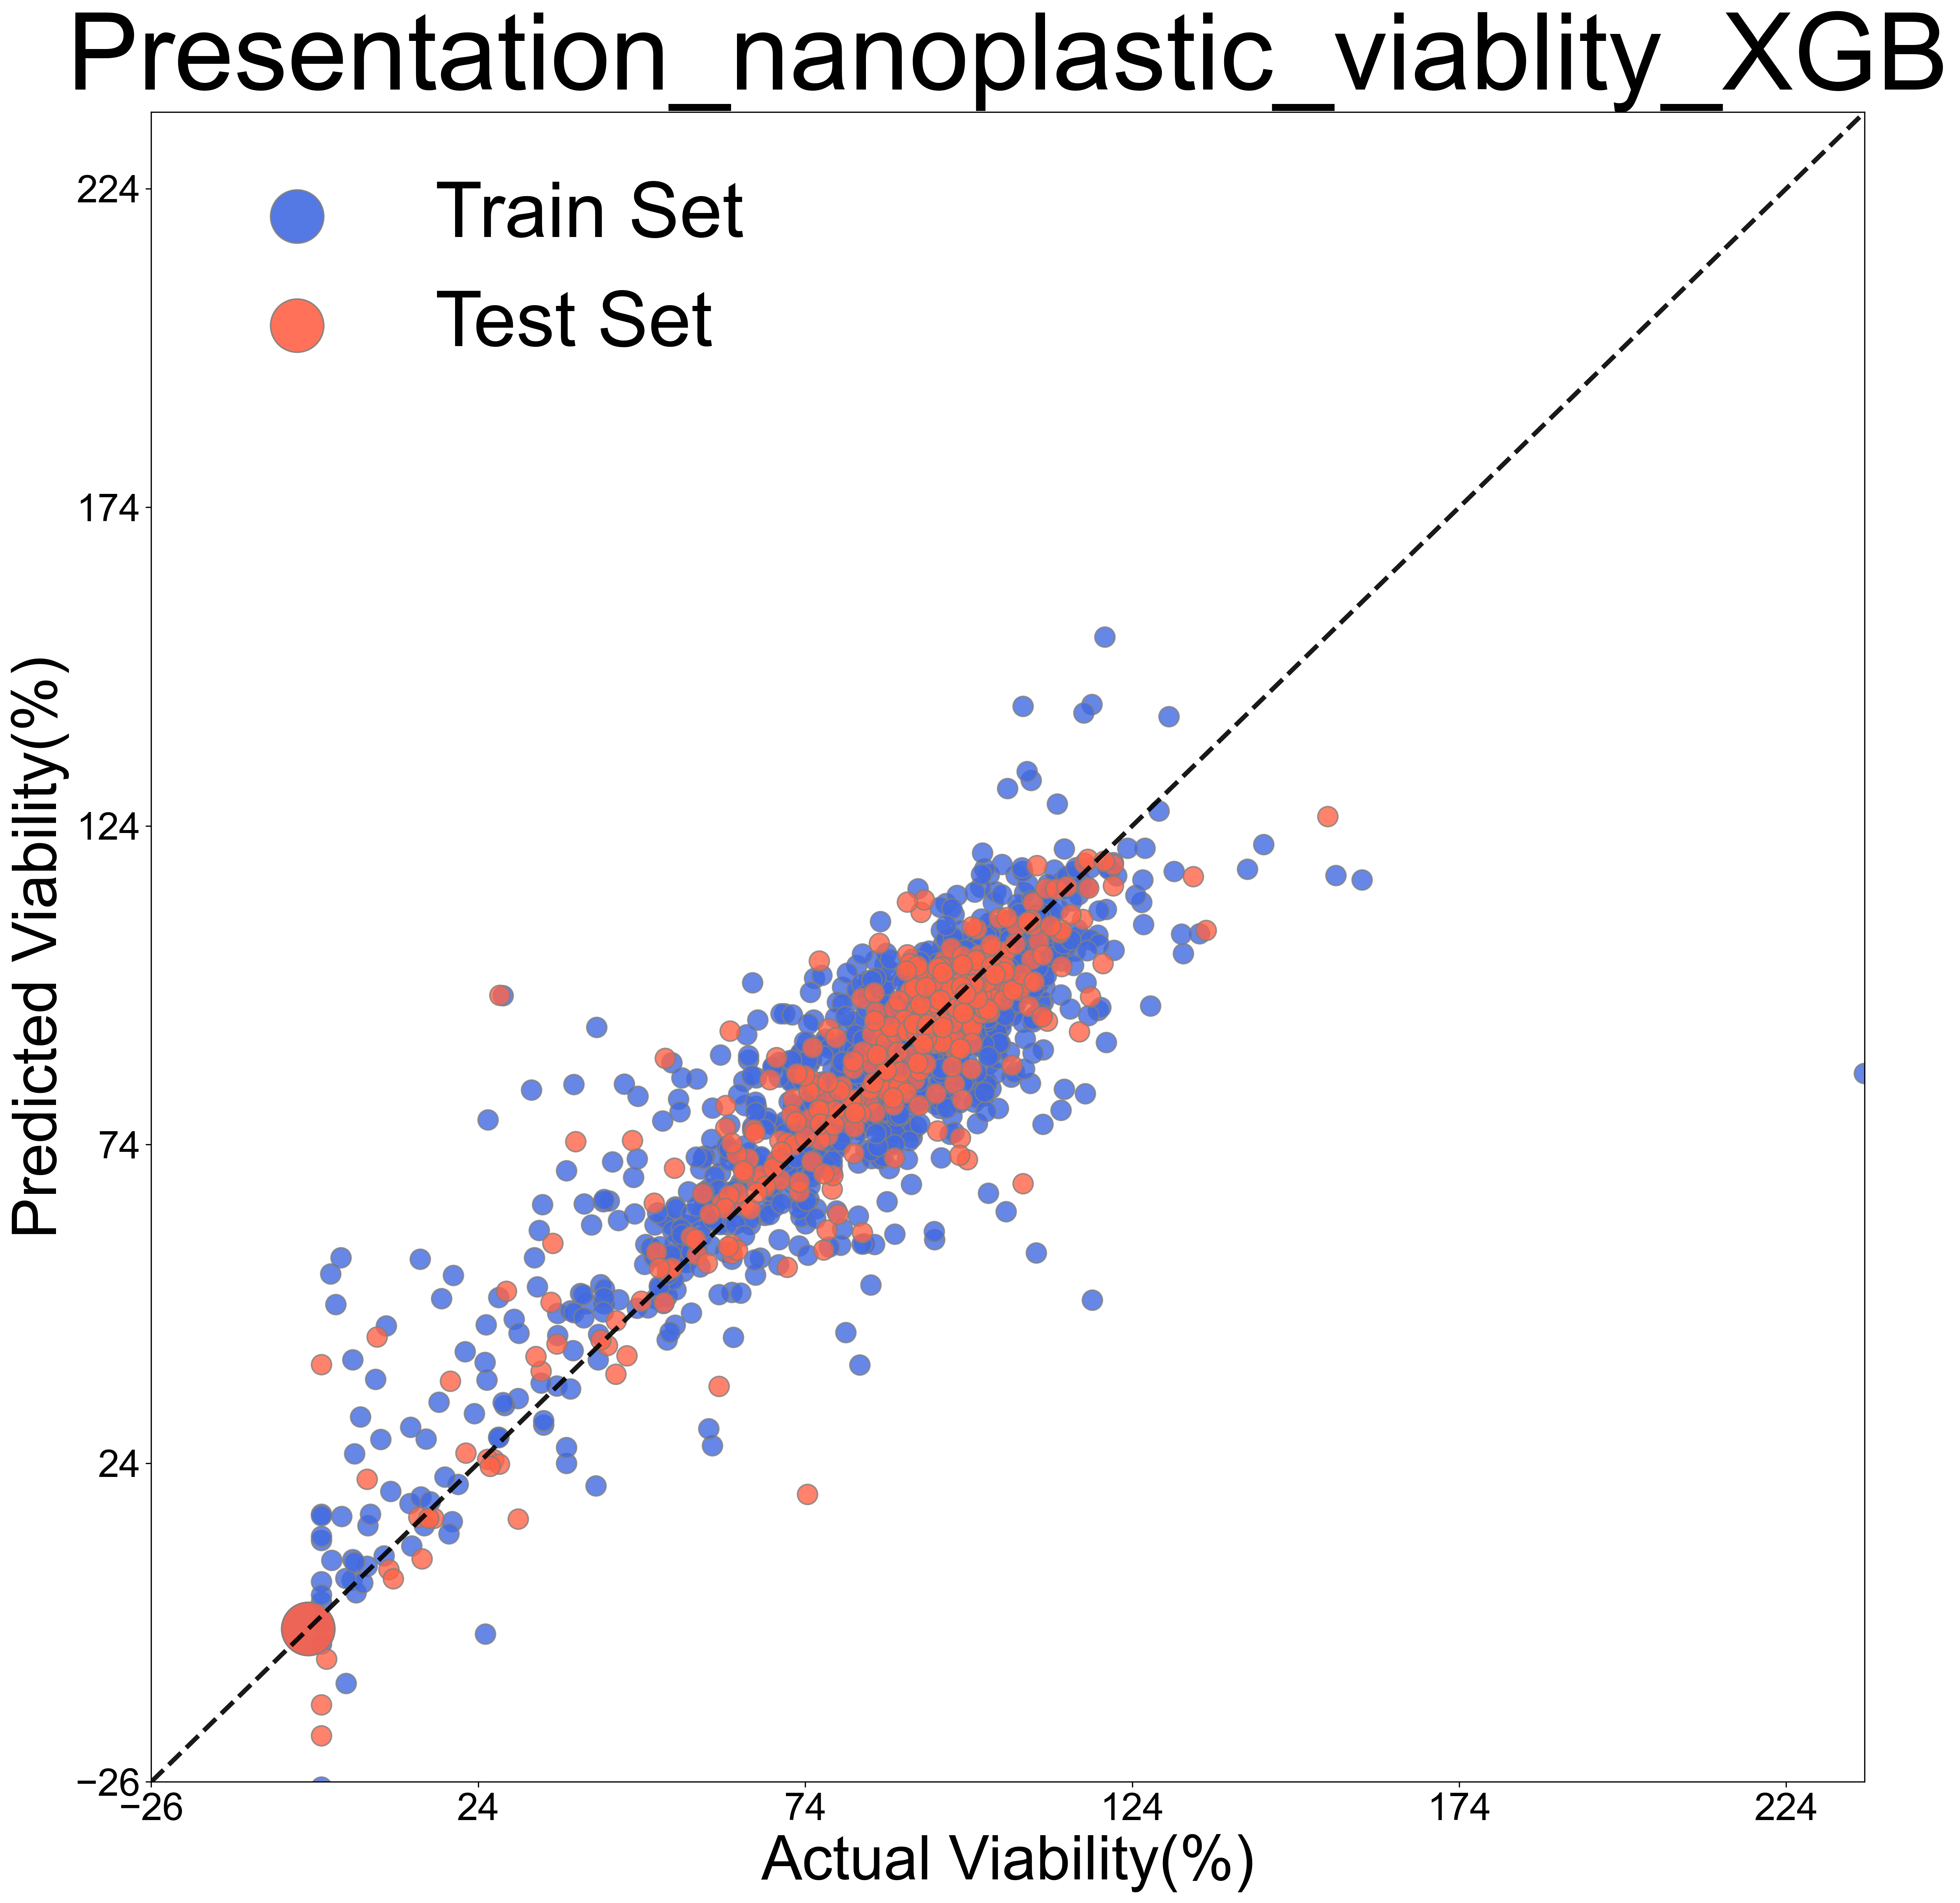

In [8]:
#Model XGBoost

'''
Parameter optimization and five-fold cross validation and parameter optimization

'''

score_5cv_all = []

for i in range(0, 200, 1):
    xgbr =XGBR(random_state=i)
    score_5cv =cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(score_5cv_all.index(score_max_5cv)))

random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]
print(random_state_5cv)

#learning_rate
score_5cv_all = []
for i in np.arange(0.01, 0.5, 0.01):
    xgbr = XGBR(learning_rate=i
              ,random_state=random_state_5cv)
    score_5cv = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
print("Best_5cv score：{}".format(score_max_5cv),
      "lr_5cv:{}".format(score_5cv_all.index(score_max_5cv)))
n_lr_5cv = np.arange(0.01,0.5,0.01)[score_5cv_all.index(score_max_5cv)]
print(n_lr_5cv)

#n_estimator
score_5cv_all = []
for i in range(1, 200, 1):
    xgbr = XGBR(n_estimators=i,
               learning_rate=n_lr_5cv,
        random_state=random_state_5cv)
    score_5cv = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(score_5cv_all.index(score_max_5cv)))
n_est_5cv = range(1,200)[score_5cv_all.index(score_max_5cv)]
print(n_est_5cv)

#Max_depth

score_5cv_all = []
for i in range(1, 100, 1):
    xgbr = XGBR(n_estimators=n_est_5cv,
               learning_rate=n_lr_5cv
                                , random_state=random_state_5cv
                                , max_depth=i)
    score_5cv = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(score_5cv_all.index(score_max_5cv)))
max_depth_5cv = range(1,100)[score_5cv_all.index(score_max_5cv)]
print(max_depth_5cv )


#Gamma

score_5cv_all = []
for i in np.arange(0,5,0.05):
    xgbr = XGBR(n_estimators=n_est_5cv,
               learning_rate=n_lr_5cv
                                , random_state=random_state_5cv
                                , max_depth=max_depth_5cv
                                ,gamma=i)
    score_5cv = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
print("Best_5cv score：{}".format(score_max_5cv),
      "gamma_5cv:{}".format(score_5cv_all.index(score_max_5cv)))
max_gamma_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]
print(max_gamma_5cv)


#Alpha

score_5cv_all = []
for i in np.arange(0,5,0.05):
    xgbr = XGBR(n_estimators=n_est_5cv,
               learning_rate=n_lr_5cv
                                , random_state=random_state_5cv
                                , max_depth=max_depth_5cv
                                , gamma=max_gamma_5cv 
                                , alpha=i)
    score_5cv = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
    CV_predictions = cross_val_predict(xgbr, Xtrain, Ytrain, cv=5)
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
print("Best_5cv score：{}".format(score_max_5cv),
      "alpha_5cv:{}".format(score_5cv_all.index(score_max_5cv)))
max_alpha_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]
print(max_alpha_5cv)

xgbr = XGBR(learning_rate=n_lr_5cv,n_estimators=n_est_5cv,random_state=random_state_5cv,max_depth=max_depth_5cv,gamma =max_gamma_5cv,alpha = max_alpha_5cv)
CV_score = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(xgbr, Xtrain, Ytrain, cv=5)
rmse = np.sqrt(mean_squared_error(Ytrain,CV_predictions))#训练集的标签与预测出来的标签打分

print("5cv:",CV_score)
print("RMSE_5CV",rmse)
expvspred_5cv = {'Exp': Ytrain, 'Pred':CV_predictions}
pd.DataFrame(expvspred_5cv).to_excel(r'E:\nanoplastics\nanoplastic_model\XGB_model_new\XGBoost_5fcv_predictions_test.xlsx')


'''
Test set validation

'''

XGB = XGBR(n_estimators=n_est_5cv,random_state=random_state_5cv,max_depth=max_depth_5cv)
regressor = XGB.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
rmse = np.sqrt(mean_squared_error(Ytest,test_predictions))
print("test:",score_test)
print("rmse_test",rmse)
expvspred_test = {'Exp':Ytest,'Pred':test_predictions}
pd.DataFrame(expvspred_test).to_excel(r'E:\nanoplastics\nanoplastic_model\XGB_model_new\XGB_test_predictions.xlsx')




In [10]:
xgbr= XGBR(learning_rate=0.3,n_estimators=192,random_state=0,max_depth=6,gamma =1.1,alpha = 0)

In [13]:

CV_score = cross_val_score(xgbr, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(xgbr, Xtrain, Ytrain, cv=5)
# rmse = np.sqrt(mean_squared_error(Ytrain,CV_predictions))#训练集的标签与预测出来的标签打分
mae = MAE(Ytrain,CV_predictions)
print("CV_MAE:",mae)

CV_MAE: 7.658524698898894


In [14]:
regressor = xgbr.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
# rmse = np.sqrt(mean_squared_error(Ytest,test_predictions))
mae_test = MAE(Ytest,test_predictions)
print("MAE_test",mae_test)

MAE_test 6.787599223884394


In [4]:
XGB.fit(Xtrain,Ytrain)

XGBRegressor(alpha=1.4, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.27, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=188, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1.39999998, ...)

In [17]:
feature_importance = XGB.feature_importances_
pd.DataFrame(sorted(zip(feature_importance,Xtrain.columns),reverse=True)).to_excel(r'C:\Users\22858\Desktop\nanoplastics\nanoplastic model\XGB_model\feature_importance.xlsx')

In [10]:
importance = XGB.get_booster().get_score(importance_type='gain')

In [11]:
importance

{'Concentration(μg/mL)': 102.3390884399414,
 'Diameter(nm)': 136.67062377929688,
 'Exposure time': 88.55406951904297,
 'x0_ Polyethylene(PE)': 26.697341918945312,
 'x0_ Polyvinyl chloride (PVC) ': 0.4549395442008972,
 'x0_Acrylonitrile Butadiene Styrene (ABS)': 172.2560577392578,
 'x0_Aged-Polystyrene(PS)': 34.69887924194336,
 'x0_Poly(methyl methacrylate) (PMMA)': 8.38327693939209,
 'x0_Polydisperse PE': 7.425023555755615,
 'x0_Polyethylene (High density PE)': 19.268356323242188,
 'x0_Polyethylene (Low density PE)': 42.102020263671875,
 'x0_Polyethylene Terephthalate (PET)': 74.61792755126953,
 'x0_Polyethylene terephthalate (PET)': 5.515340328216553,
 'x0_Polyethylene(PE)': 13.436943054199219,
 'x0_Polypropylene(PP)': 16.03532600402832,
 'x0_Polystyrene(PS)': 65.32312774658203,
 'x0_Polyvinyl Chloride (PVC)': 35.30202865600586,
 'x0_Polyvinyl Chloride (PVC) ': 57.20682144165039,
 'x0_Polyvinyl chloride (PVC)': 132.29026794433594,
 'x0_polypropylene(pp) ': 373.5823059082031,
 'x1_Comm

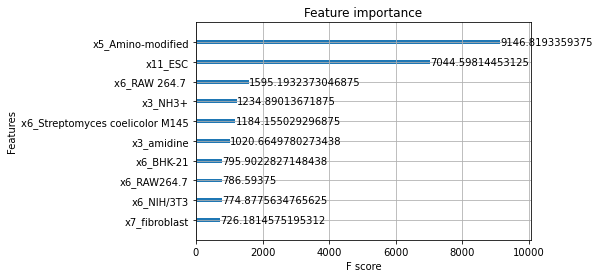

In [16]:
from xgboost import plot_importance
plot_importance(importance,max_num_features=10)
plt.show()